# Churn model of a bank customer using ANN

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [5]:
df = pd.read_csv("./datasets/Churn_Modelling.csv")

df.info
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Create feature set and target set
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


## Categorical encoding

In [7]:
# Categorical Encoding using dummies
geography = pd.get_dummies(X["Geography"], drop_first=True)
gender = pd.get_dummies(X["Gender"], drop_first=True)

geography.head()

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True


In [8]:
# Concatenate the DataFrames
X = pd.concat([X, geography, gender], axis=1)

# Drop Unnecessary columns
X = X.drop(["Geography", "Gender"], axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


## Scaling

In [9]:
# Splitting the dataset into Training and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# Feature Scaling
# Feature scaling helps reduce time for calculation of weights

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Creation of an ANN model

We have completed the preprocessing steps. Now we create the ML model.

In [11]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# from keras.layers import LeakyReLU, PReLU, ELU
# from keras.layers import Dropout

# ps. in older version we had to import Tensorflow and then import Keras
# eg. previous program

In [12]:
# Initializing the ANN
classifier = Sequential()

# Adding the input and the first hidden layer
classifier.add(
    Dense(6, kernel_initializer="he_uniform", activation="relu", input_dim=11)
)

# kernel_initializer - how to initialize the weights

# Adding the second hidden layer
classifier.add(Dense(6, kernel_initializer="he_uniform", activation="relu"))

# Adding third hidden layer
# classifier.add(Dense(8, kernel_initializer = 'he_uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid"))

In [13]:
# Compiling ANN
# We can use any optimizer (eg. Adam is a good optimizer)

classifier.compile(optimizer="Adamax", loss="binary_crossentropy", metrics=["accuracy"])

In [26]:
# Fitting the ANN to the Training set
# Validation_split -> 33% of training data is used for validation
# batch_size -> number of rows that are sent to the model at a time

model_history = classifier.fit(
    X_train, y_train, validation_split=0.33, batch_size=10, epochs=20
)

Epoch 1/20
536/536 [==============================] - 1s 944us/step - loss: 0.4120 - accuracy: 0.8281 - val_loss: 0.4282 - val_accuracy: 0.8164
Epoch 2/20
536/536 [==============================] - 0s 877us/step - loss: 0.4113 - accuracy: 0.8266 - val_loss: 0.4276 - val_accuracy: 0.8164
Epoch 3/20
536/536 [==============================] - 1s 969us/step - loss: 0.4107 - accuracy: 0.8272 - val_loss: 0.4268 - val_accuracy: 0.8171
Epoch 4/20
536/536 [==============================] - 0s 933us/step - loss: 0.4101 - accuracy: 0.8281 - val_loss: 0.4261 - val_accuracy: 0.8167
Epoch 5/20
536/536 [==============================] - 0s 934us/step - loss: 0.4096 - accuracy: 0.8298 - val_loss: 0.4257 - val_accuracy: 0.8179
Epoch 6/20
536/536 [==============================] - 0s 913us/step - loss: 0.4091 - accuracy: 0.8294 - val_loss: 0.4250 - val_accuracy: 0.8194
Epoch 7/20
536/536 [==============================] - 0s 893us/step - loss: 0.4086 - accuracy: 0.8304 - val_loss: 0.4244 - val_accuracy:

## Visualization

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<function matplotlib.pyplot.show(close=None, block=None)>

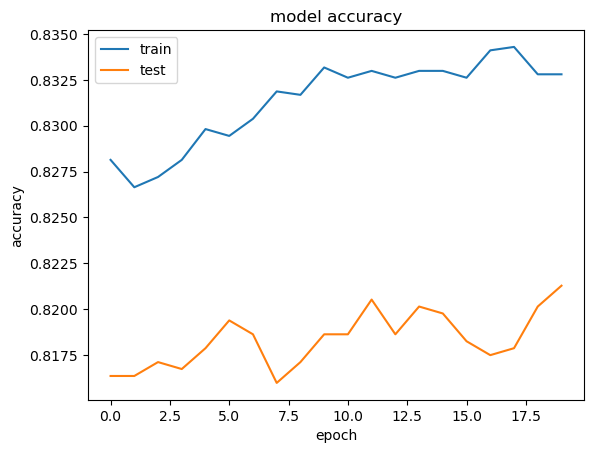

In [27]:
# List all data in history
print(model_history.history.keys())

# summarize history for accuracy
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<function matplotlib.pyplot.show(close=None, block=None)>

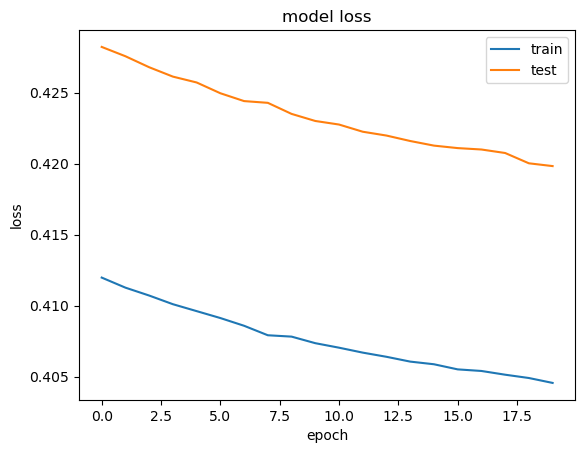

In [28]:
# List all data in history
print(model_history.history.keys())

# summarize history for loss
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper right")
plt.show

In [23]:
# Part 3 - Making the predictions and evaluating the model
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5

 1/63 [..............................] - ETA: 0s

63/63 [==============================] - 0s 379us/step


In [24]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[1510,   85],
       [ 274,  131]], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_pred, y_test)
score

0.8205